In [ ]:
#################################################################################
# Author: Paulina Arregocés Guerra
# Research groups 
# GITA (Applied Telecommunications Research Group)  - Universidad de Antioquia 
# GIDIA (Artificial Intelligence Research Group) - Universidad Nacional de Colombia
#
# Last modified on 06/06/2023 
# Desciotion: This code is used to label the dataset and to train and test the decision # tree and support vector machine models with real data. 
#################################################################################

In [1]:
# Uncomment for requirement libraries versions
#!pip install -r requirements.txt 

# Select your preferences and run the install command...https://pytorch.org/
#!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached asttokens-2.0.8-py2.py3-none-any.whl (23 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached blis-0.7.8-cp310-cp310-win_amd64.whl (6.6 MB)
  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached certifi-2022.9.14-py3-none-any.whl (162 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached colorama-0.4.5-py2.py3-none-any.whl (16 kB)
  Using cached confection-0.0.2-py3-none-any.whl (32 kB)
  Using cached contourpy-1.0.5-cp310-cp310-win_amd64.whl (164 kB)
  Using cached cymem-2.0.6-cp310-cp310-win_amd64.whl (36 kB)
  Using cached debugpy-1.6.3-cp310-cp310-win_amd64.whl (4.6 MB)
  Using cached dill-0.3.5.1-py2.py3-none-any.whl (95 kB)
  Using cached distlib-0.3.6-py2.py3-none-any.whl (468 kB)
  Using cached easygui-0.98.3-py2.py3-none-any.whl

ERROR: Ignored the following versions that require a different python version: 0.23.0 Requires-Python >=3.6, <3.10; 0.5.0 Requires-Python >=2.7,<3; 0.6.0 Requires-Python >=2.7,<=3.7; 0.9.0 Requires-Python >=2.7,<=3.7
ERROR: Could not find a version that satisfies the requirement torch==1.12.1+cu116 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution found for torch==1.12.1+cu116


## ISCX Botnet2014
From this dataset we choose a very common set of packet-level features, 5 tuples (IP addresses, layer 4 protocol and ports) as a 104-bit input vector.

In [2]:
#libraries 
import os
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import tree
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import joblib  
import time

In [3]:
#Loading csv files
file= os.getcwd()
print(file)
trainig_csv=pd.read_csv('.\CSV_TXT\ISCX_Botnet-Training.pcap_Flow.csv')  
test_csv=pd.read_csv('.\CSV_TXT\ISCX_Botnet-Testing.pcap_Flow.csv')

c:\Users\Informatica\Desktop\PAULINA\Entornos2\BNN_Exploration\env\src\BOTNET2014\CODE


In [4]:
# Concatenate the records of each file to the DataFrame that we initialize
df = pd.concat([trainig_csv, test_csv],  ignore_index = True)

## Data exploration

In [5]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,10/08/2011 04:01:40 am,59086131,8,0,...,0,2987276.0,0.0,2987276.0,2987276.0,1.869962e+07,1.947112e+07,41116855.0,5999291.0,NeedManualLabel
1,147.32.84.180-74.125.232.195-1027-80-6,147.32.84.180,1027,74.125.232.195,80,6,10/08/2011 04:04:26 am,45126,7,3,...,20,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,NeedManualLabel
2,147.32.84.180-147.32.84.255-137-137-17,147.32.84.180,137,147.32.84.255,137,17,10/08/2011 04:04:23 am,12452268,38,0,...,8,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,NeedManualLabel
3,147.32.84.180-147.32.80.9-1025-53-17,147.32.84.180,1025,147.32.80.9,53,17,10/08/2011 04:04:24 am,118741070,6,3,...,8,2276383.0,0.0,2276383.0,2276383.0,1.161281e+08,0.000000e+00,116128125.0,116128125.0,NeedManualLabel
4,147.32.84.180-94.63.149.152-1040-80-6,147.32.84.180,1040,94.63.149.152,80,6,10/08/2011 04:06:36 am,180643,26,10,...,20,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,NeedManualLabel


In [6]:
df.shape

(677598, 84)

In [7]:
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [8]:
df.dtypes

Flow ID       object
Src IP        object
Src Port       int64
Dst IP        object
Dst Port       int64
              ...   
Idle Mean    float64
Idle Std     float64
Idle Max     float64
Idle Min     float64
Label         object
Length: 84, dtype: object

In [9]:
df[{'Src IP','Dst IP','Label'}].head(10)

C:\Users\Informatica\AppData\Local\Temp\ipykernel_9836\3255981479.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[{'Src IP','Dst IP','Label'}].head(10)


,Label,Dst IP,Src IP
0,NeedManualLabel,8.0.6.4,8.6.0.1
1,NeedManualLabel,74.125.232.195,147.32.84.180
2,NeedManualLabel,147.32.84.255,147.32.84.180
3,NeedManualLabel,147.32.80.9,147.32.84.180
4,NeedManualLabel,94.63.149.152,147.32.84.180
5,NeedManualLabel,60.190.223.75,147.32.84.180
6,NeedManualLabel,60.190.223.75,147.32.84.180
7,NeedManualLabel,122.224.6.164,147.32.84.180
8,NeedManualLabel,147.32.84.255,147.32.84.180
9,NeedManualLabel,8.0.6.4,8.6.0.1


## Data labeling

In [16]:
'''
CSV files are not labeled, this information is useful for that task

List of malicious IPs

IRC
192.168.2.112 -> 131.202.243.84
192.168.5.122 -> 198.164.30.2
192.168.2.110 -> 192.168.5.122
192.168.4.118 -> 192.168.5.122
192.168.2.113 -> 192.168.5.122
192.168.1.103 -> 192.168.5.122
192.168.4.120 -> 192.168.5.122
192.168.2.112 -> 192.168.2.110
192.168.2.112 -> 192.168.4.120
192.168.2.112 -> 192.168.1.103
192.168.2.112 -> 192.168.2.113
192.168.2.112 -> 192.168.4.118
192.168.2.112 -> 192.168.2.109
192.168.2.112 -> 192.168.2.105
192.168.1.105 -> 192.168.5.122
Neris: 147.32.84.180
RBot: 147.32.84.170
Menti: 147.32.84.150
Sogou: 147.32.84.140
Murlo: 147.32.84.130
Virut: 147.32.84.160
IRCbot and black hole1: 10.0.2.15
Black hole 2: 192.168.106.141
Black hole 3: 192.168.106.131
TBot: 172.16.253.130, 172.16.253.131, 172.16.253.129, 172.16.253.240
Weasel: Botmaster IP: 74.78.117.238; Bot IP: 158.65.110.24
Zeus (zeus sample 1 and 2 and 3, bin_zeus): 192.168.3.35, 192.168.3.25, 192.168.3.65, 172.29.0.116
Osx_trojan: 172.29.0.109
Zero access (zero access 1 and 2): 172.16.253.132, 192.168.248.165
Smoke bot: 10.37.130.4

'''

'\nCSV files are not labeled, this information is useful for that task\n\nList of malicious IPs\n\nIRC\n192.168.2.112 -> 131.202.243.84\n192.168.5.122 -> 198.164.30.2\n192.168.2.110 -> 192.168.5.122\n192.168.4.118 -> 192.168.5.122\n192.168.2.113 -> 192.168.5.122\n192.168.1.103 -> 192.168.5.122\n192.168.4.120 -> 192.168.5.122\n192.168.2.112 -> 192.168.2.110\n192.168.2.112 -> 192.168.4.120\n192.168.2.112 -> 192.168.1.103\n192.168.2.112 -> 192.168.2.113\n192.168.2.112 -> 192.168.4.118\n192.168.2.112 -> 192.168.2.109\n192.168.2.112 -> 192.168.2.105\n192.168.1.105 -> 192.168.5.122\nNeris: 147.32.84.180\nRBot: 147.32.84.170\nMenti: 147.32.84.150\nSogou: 147.32.84.140\nMurlo: 147.32.84.130\nVirut: 147.32.84.160\nIRCbot and black hole1: 10.0.2.15\nBlack hole 2: 192.168.106.141\nBlack hole 3: 192.168.106.131\nTBot: 172.16.253.130, 172.16.253.131, 172.16.253.129, 172.16.253.240\nWeasel: Botmaster IP: 74.78.117.238; Bot IP: 158.65.110.24\nZeus (zeus sample 1 and 2 and 3, bin_zeus): 192.168.3.35, 

In [10]:
# We create a function to label the data 

malicious_source=['147.32.84.170','147.32.84.180','147.32.84.140','147.32.84.130','147.32.84.160','10.0.2.15',
                 '192.168.106.141','192.168.106.131', '172.16.253.130','172.16.253.131','172.16.253.129', 
                 '172.16.253.240','74.78.117.238','158.65.110.24','192.168.3.35','192.168.3.25', '192.168.3.65'
                 '192.168.3.65','172.29.0.116','172.29.0.109','172.16.253.132','192.168.248.165','10.37.130.4']

malicious_src_dst= [('192.168.2.112','131.202.243.84'), ('192.168.5.122','198.164.30.2'),
                    ('192.168.2.110','192.168.5.122'), ('192.168.4.118','192.168.5.122'), 
                    ('192.168.2.113','192.168.5.122'),('192.168.1.103', '192.168.5.122'),
                    ('192.168.4.120','192.168.5.122'),('192.168.2.112', '192.168.2.110'),
                    ('192.168.2.112','192.168.4.120'),('192.168.2.112','192.168.1.103'),
                    ('192.168.2.112','192.168.2.113'),('192.168.2.112','192.168.4.118'),
                    ('192.168.2.112','192.168.2.109'),('192.168.2.112','192.168.2.105'),
                    ('192.168.1.105','192.168.5.122')]


def src_malicious_dst(d1,d2):

    if (d1,d2) in malicious_src_dst:
        etiqueta= 1 # attack
    elif d1 in malicious_source:
        etiqueta= 1  # attack
    else: etiqueta= 0  # no ataque
            
    return etiqueta

In [11]:
new=df[{'Src IP', 'Dst IP'}] 
labels=[]

for a,b in new.values: 
    label = src_malicious_dst(a,b)
    labels.append(label)

C:\Users\Informatica\AppData\Local\Temp\ipykernel_9836\831419681.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  new=df[{'Src IP', 'Dst IP'}]


In [12]:
df['Label']=pd.DataFrame(labels)

In [13]:
df[{'Src IP','Dst IP','Label'}].tail(30)

C:\Users\Informatica\AppData\Local\Temp\ipykernel_9836\3919072207.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[{'Src IP','Dst IP','Label'}].tail(30)


,Label,Dst IP,Src IP
677568,1,158.65.110.24,74.78.112.46
677569,0,24.23.131.143,172.16.0.11
677570,0,72.20.15.61,147.32.84.180
677571,0,158.65.12.103,158.65.110.24
677572,0,10.0.0.254,172.16.2.11
677573,0,174.128.246.102,147.32.84.180
677574,0,147.32.80.9,147.32.84.160
677575,0,65.55.37.120,147.32.84.160
677576,0,68.142.237.182,172.16.0.11
677577,0,66.96.142.52,147.32.84.180


In [14]:
df_copy=df.copy()

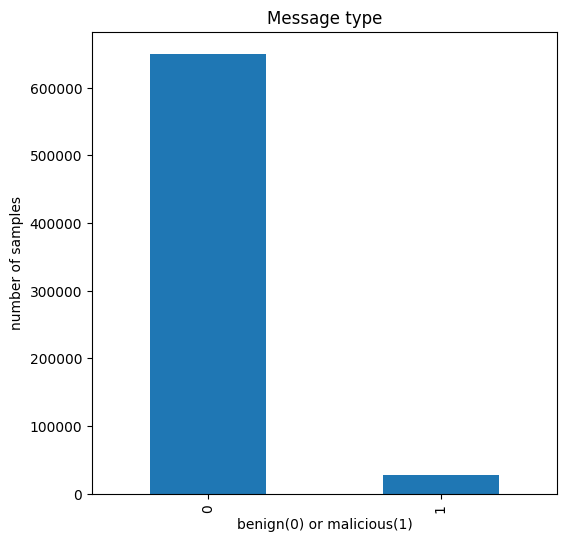

In [15]:
df_copy['Label'].value_counts().plot(kind='bar', figsize=(6, 6),title='Message type', xlabel='benign(0) or malicious(1)', ylabel='number of samples')
show()

In [23]:
# Uncomment and Run to save 
#df_copy.to_csv('Labeled_Data.csv', index=False)

## Training DT and SVM models

In [16]:
Data=pd.read_csv('.\CSV_TXT\Labeled_Data.csv')

In [17]:
Data.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,10/08/2011 04:01:40 am,59086131,8,...,0,2987276.0,0.0,2987276.0,2987276.0,1.869962e+07,1.947112e+07,41116855.0,5999291.0,0
1,1,147.32.84.180-74.125.232.195-1027-80-6,147.32.84.180,1027,74.125.232.195,80,6,10/08/2011 04:04:26 am,45126,7,...,20,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
2,2,147.32.84.180-147.32.84.255-137-137-17,147.32.84.180,137,147.32.84.255,137,17,10/08/2011 04:04:23 am,12452268,38,...,8,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
3,3,147.32.84.180-147.32.80.9-1025-53-17,147.32.84.180,1025,147.32.80.9,53,17,10/08/2011 04:04:24 am,118741070,6,...,8,2276383.0,0.0,2276383.0,2276383.0,1.161281e+08,0.000000e+00,116128125.0,116128125.0,1
4,4,147.32.84.180-94.63.149.152-1040-80-6,147.32.84.180,1040,94.63.149.152,80,6,10/08/2011 04:06:36 am,180643,26,...,20,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1


In [18]:
# Function to Transform IP values
def Conv_IP(dirip):
    new= dirip.replace('.','')
    return int(new)

In [19]:
# Tranform IP 
Data['Src IP'] = Data['Src IP'].apply(lambda x:Conv_IP(x)).astype(int)
Data['Dst IP'] = Data['Dst IP'].apply(lambda x:Conv_IP(x)).astype(int)

In [20]:
#dividimos en sets de entrenamiento y test
df_X=Data[{'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol'}]
df_Y=Data['Label']

C:\Users\Informatica\AppData\Local\Temp\ipykernel_9836\3466849296.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_X=Data[{'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol'}]


In [21]:
# Training and testing data
x_train, x_test, y_train, y_test = train_test_split(df_X, df_Y,random_state = 3, train_size=0.7)
scaler = StandardScaler() 
xtrain_scaled = scaler.fit_transform(x_train)
xtest_scaled = scaler.fit_transform(x_test)

In [22]:
# Uncomment to save model
# joblib.dump(StandardScaler, 'BOTNET_scaler.pkl') 

## Decision tree 

In [23]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(xtrain_scaled, y_train)

In [24]:
y_predict = clf.predict(xtest_scaled)

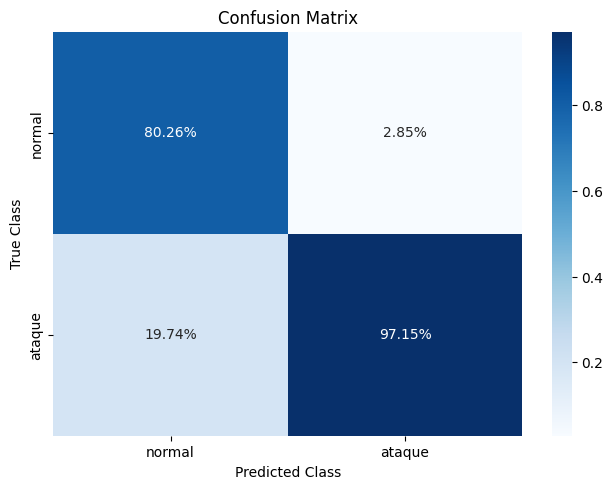

In [25]:
Y_actual= y_test
Y_predict= y_predict

# crear matriz de confusión
matrix= confusion_matrix(Y_actual,Y_predict)

# crear marco de datos de pandas Crear un conjunto de datos
class_names= ['normal','ataque']
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# crear mapa de calor dibujar mapa de calor
sns.heatmap(dataframe/np.sum(dataframe), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [26]:
print('Accuracy Score is', accuracy_score(Y_actual,Y_predict))
print('Classificaction Report')
print(classification_report(Y_actual,Y_predict))

Accuracy Score is 0.8564197166469893
Classificaction Report
              precision    recall  f1-score   support

           0       0.80      0.98      0.88    113008
           1       0.97      0.70      0.81     90272

    accuracy                           0.86    203280
   macro avg       0.89      0.84      0.85    203280
weighted avg       0.88      0.86      0.85    203280



In [35]:
# Uncomment to save model  
#joblib.dump(clf, 'BOTNET_DT_noparams.pkl') # Guardo el modelo.

In [36]:
# Uncomment to upload model and test it  
#clf_dt = joblib.load('BOTNET_DT_noparams.pkl') # Carga del modelo.
#clf_dt.score(xtest_scaled, y_test)

# Getting DT params
#print(clf_dt.get_params())

0.5147038567493113

## Decision tree grid search params 

Optimal hyperparameter combination: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 9}

Mean cross-validated training accuracy score: 0.9919927141977247
Test accuracy: 0.86


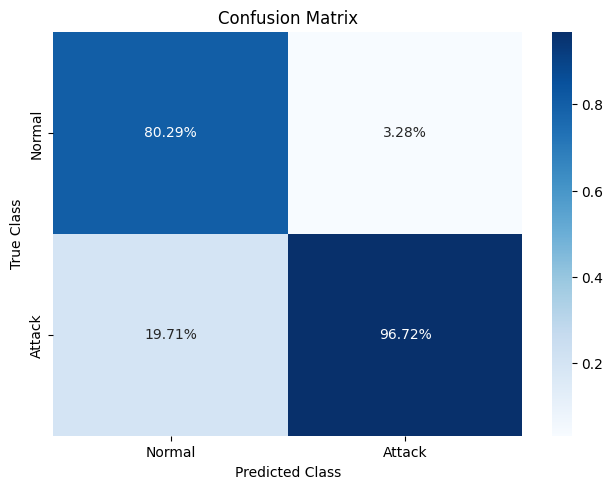

Accuracy Score is 0.8555981896890987
Classificaction Report
              precision    recall  f1-score   support

           0       0.80      0.98      0.88    113008
           1       0.97      0.70      0.81     90272

    accuracy                           0.86    203280
   macro avg       0.89      0.84      0.85    203280
weighted avg       0.88      0.86      0.85    203280

Execution time of Grid Search (in Seconds): 57.60366368293762



In [27]:
# Let's measure execution time too
start = time.time()

clf2 = tree.DecisionTreeClassifier(random_state=0)

# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[17,18,19,20], 
                        'min_samples_leaf':[1,2,3,4], 
                        'min_samples_split':[9,10,11,12]}

gs = GridSearchCV(clf, param_grid=hyperparameter_space, 
                  scoring='accuracy' ,
                  n_jobs=-1, cv=5, return_train_score=True)

gs.fit(xtrain_scaled, y_train)
print("Optimal hyperparameter combination:", gs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      gs.best_score_)
gs.best_estimator_.fit(xtrain_scaled, y_train)
y_pred = gs.best_estimator_.predict(xtest_scaled)
y_true = y_test 

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Create Confusion matrix
matrix= confusion_matrix(y_true, y_pred)

class_names= ['Normal','Attack']
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(dataframe/np.sum(dataframe), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print('Accuracy Score is', accuracy_score(y_true,y_pred))
print('Classificaction Report')
print(classification_report(y_true,y_pred))

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print()

In [39]:
# Uncomment to save model
#joblib.dump(gs.best_estimator_, 'BOTNET_DT_params.pkl') # Guardo el modelo.

# Uncomment to upload model and test it 
#clf2_dt = joblib.load('BOTNET_DT_params.pkl') # Carga del modelo.
#clf2_dt.score(xtest_scaled, y_test)

# Getting DT params
#print(clf2_dt.get_params())

### SVM

In [28]:
#clf2 = SVC(C=0.5, kernel='rbf', random_state=0)
clf2 = SVC(random_state=0)
clf2 = clf2.fit(xtrain_scaled, y_train)

In [29]:
y_predict_SVM = clf2.predict(xtest_scaled)

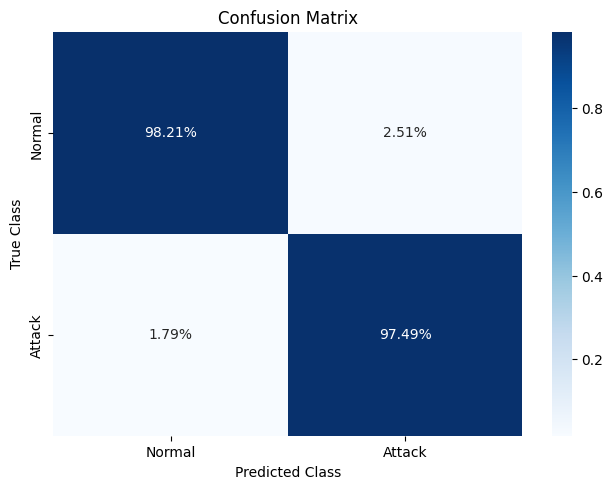

In [30]:
Y_actual= y_test
Y_predict_SVM = y_predict_SVM

# Create confusion matrix 
matrix= confusion_matrix(Y_actual,Y_predict_SVM)

class_names= ['Normal','Attack']
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(dataframe/np.sum(dataframe), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [31]:
print('Accuracy Score is', accuracy_score(Y_actual,Y_predict_SVM))
print('Classificaction Report')
print(classification_report(Y_actual,Y_predict_SVM))

Accuracy Score is 0.978901023219205
Classificaction Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    113008
           1       0.97      0.98      0.98     90272

    accuracy                           0.98    203280
   macro avg       0.98      0.98      0.98    203280
weighted avg       0.98      0.98      0.98    203280



In [46]:
# Uncomment to save model  
#joblib.dump(clf2, 'BOTNET_SVM_noparams.pkl')

In [47]:
# Uncomment to upload model and test it
#clf2_svm = joblib.load('BOTNET_SVM_noparams.pkl') 
#clf2_svm.score(xtest_scaled, y_test)
#print(clf2_svm.get_params())

c:\Users\Informatica\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


0.5143349075167257